In [45]:
import numpy as np
from sklearn.datasets import load_diabetes
import matplotlib.pyplot as plt

In [2]:
# Loading data
X, y = load_diabetes(return_X_y=True)

Text(0, 0.5, 'y')

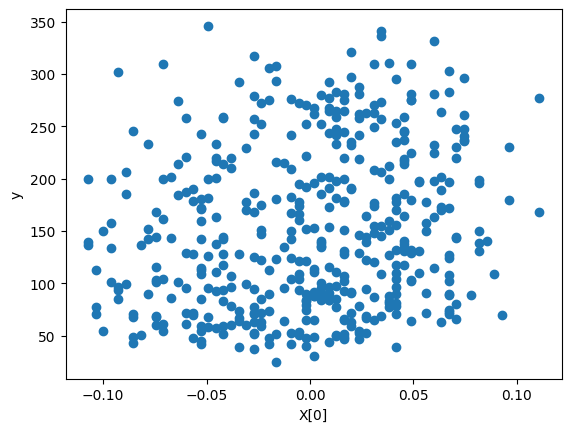

In [46]:
plt.scatter(X[:, 0], y)
plt.xlabel('X[0]')
plt.ylabel('y')

Text(0, 0.5, 'y')

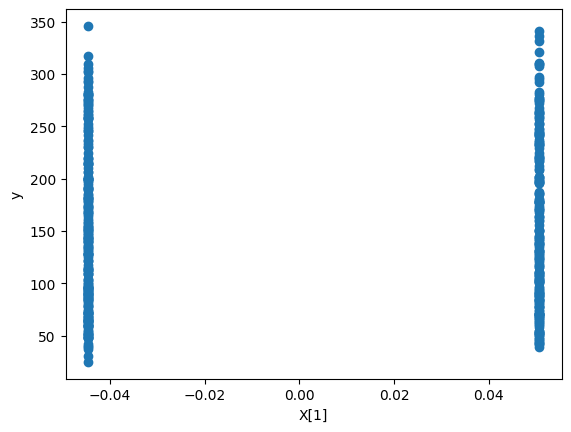

In [47]:
plt.scatter(X[:, 1], y)
plt.xlabel('X[1]')
plt.ylabel('y')

Text(0, 0.5, 'y')

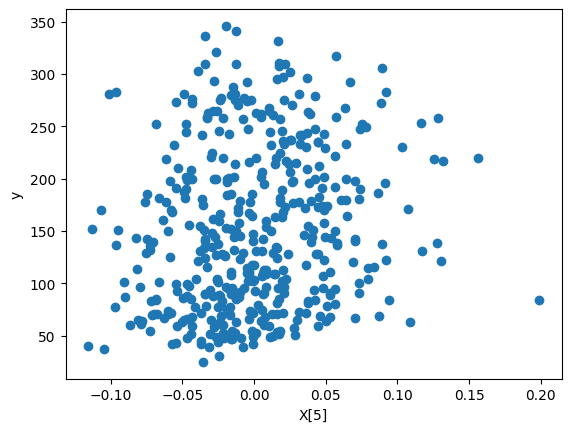

In [48]:
plt.scatter(X[:, 5], y)
plt.xlabel('X[5]')
plt.ylabel('y')

Text(0, 0.5, 'y')

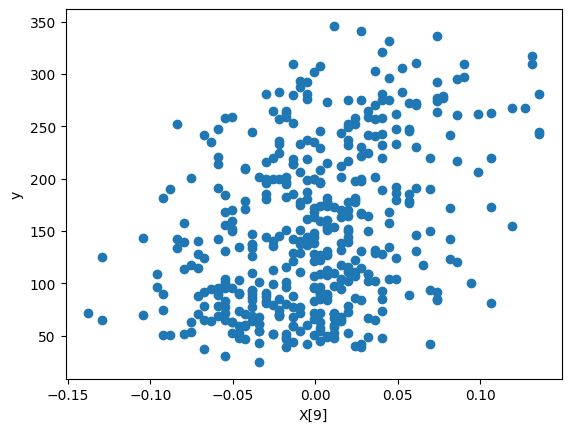

In [49]:
plt.scatter(X[:, 9], y)
plt.xlabel('X[9]')
plt.ylabel('y')

In [3]:
X

array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
         0.01990749, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
        -0.06833155, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
         0.00286131, -0.02593034],
       ...,
       [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
        -0.04688253,  0.01549073],
       [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
         0.04452873, -0.02593034],
       [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
        -0.00422151,  0.00306441]])

In [5]:
X.shape

(442, 10)

Using Sklearn Linear Regression

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=2)

In [11]:
print(X_train.shape)
print(X_test.shape)

(353, 10)
(89, 10)


In [21]:
from sklearn.linear_model import SGDRegressor, LinearRegression

In [22]:
model = LinearRegression()

In [14]:
model = SGDRegressor()

In [23]:
model.fit(X_train, y_train)

LinearRegression()

In [28]:
model.coef_

array([  -9.15865318, -205.45432163,  516.69374454,  340.61999905,
       -895.5520019 ,  561.22067904,  153.89310954,  126.73139688,
        861.12700152,   52.42112238])

In [29]:
model.intercept_

151.88331005254167

In [24]:
from sklearn.metrics import mean_squared_error, r2_score

In [25]:
y_hat = model.predict(X_test)

In [26]:
mean_squared_error(y_test, y_hat)

3094.4566715660626

In [27]:
r2_score(y_test, y_hat)

0.4399338661568968

Making our own Linear Regression Class

In [38]:
class LinearRegression_():

    def __init__(self):
        self.coef_ = None
        self.intercept_ = None

    def fit(self, X_train, y_train):
        
        # 1st Argument --> numpy array in which we are going to insert
        # 2nd Argument --> index of column (starting from 0)
        # 3rd Argument --> Value which we want to insert (1 in our case)
        # 4th Argument --> Axis in which we want to insert (axis = 1 in our case which is y-axis)
        X_train = np.insert(X_train, 0, 1, axis=1)
        # Inserting X0 = 1 in first column

        # Calculating coeffs....
        
        # beta = ((X.T * X).inverse()) * (X.T) * y

        beta = np.linalg.inv(np.dot(X_train.T, X_train)).dot(X_train.T).dot(y_train)

        self.intercept_ = beta[0]
        self.coef_ = beta[1:]

    def predict(self, X_test):
        return np.dot(X_test, self.coef_) + self.intercept_

    def coef_(self):
        print(self.coef_)

    def intercept_(self):
        print(self.intercept_)

In [39]:
model = LinearRegression_()

In [41]:
model.fit(X_train, y_train)

In [42]:
model.predict(X_test)

array([154.1213881 , 204.81835118, 124.93755353, 106.08950893,
       258.5348576 , 256.3310074 , 118.75087616, 119.52440696,
       101.50816735, 190.54048661, 141.70656811, 172.51883961,
       174.33861649, 134.80942706, 294.13994537,  94.11798038,
       211.97059795, 156.49579378, 134.21000428, 119.62664644,
       148.87842251, 165.00873409, 151.10021038, 176.04063756,
       133.27769647, 221.29555392, 197.17324941,  96.1577688 ,
        50.26012711, 230.48580317, 242.06073866, 114.11129218,
        67.07532417,  94.52943825, 201.21415375, 167.05136201,
       159.881268  , 192.78746659, 114.49551325, 233.48234551,
       140.82563045, 121.0680409 , 192.27480772, 191.12738845,
       179.16865788, 148.34935601, 163.47414622, 276.81647884,
       100.17926432, 164.10555298, 255.80762189, 136.9466204 ,
       152.37503699, 107.92237882, 194.21924678,  77.34670792,
       118.50482479,  68.38335763, 154.29258529, 162.48840259,
       168.36788326, 156.87790322,  97.14191797, 238.16

In [43]:
model.coef_

array([  -9.15865318, -205.45432163,  516.69374454,  340.61999905,
       -895.5520019 ,  561.22067904,  153.89310954,  126.73139688,
        861.12700152,   52.42112238])

In [44]:
model.intercept_

151.8833100525417